In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel('data.xlsx', index_col=0)
display(df.head())
print(df.shape)

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0


(1001, 213)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


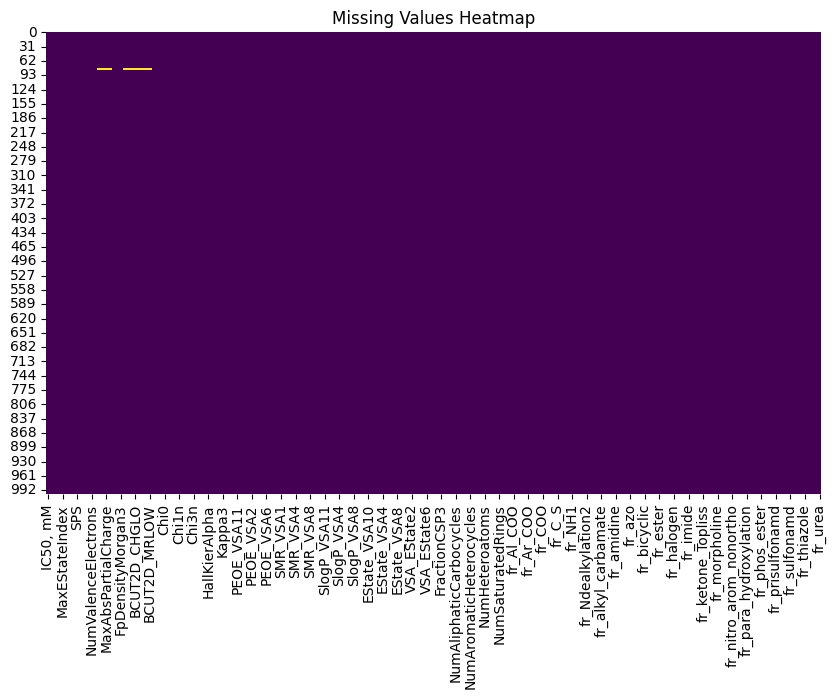

In [6]:
# Пропущенные данные
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [66]:
df = df.fillna(df.median())

In [ ]:
# Статистика по целевым переменным
numerical_features = df.select_dtypes(include=['number'])
descriptive_stats = numerical_features.describe()

print("\nDescriptive Statistics for IC50, CC50, and SI:\n", descriptive_stats[['IC50, mM', 'CC50, mM', 'SI']])


Descriptive Statistics for IC50, CC50, and SI:
           IC50, mM     CC50, mM            SI
count  1001.000000  1001.000000   1001.000000
mean    222.805156   589.110728     72.508823
std     402.169734   642.867508    684.482739
min       0.003517     0.700808      0.011489
25%      12.515396    99.999036      1.433333
50%      46.585183   411.039342      3.846154
75%     224.975928   894.089176     16.566667
max    4128.529377  4538.976189  15620.600000


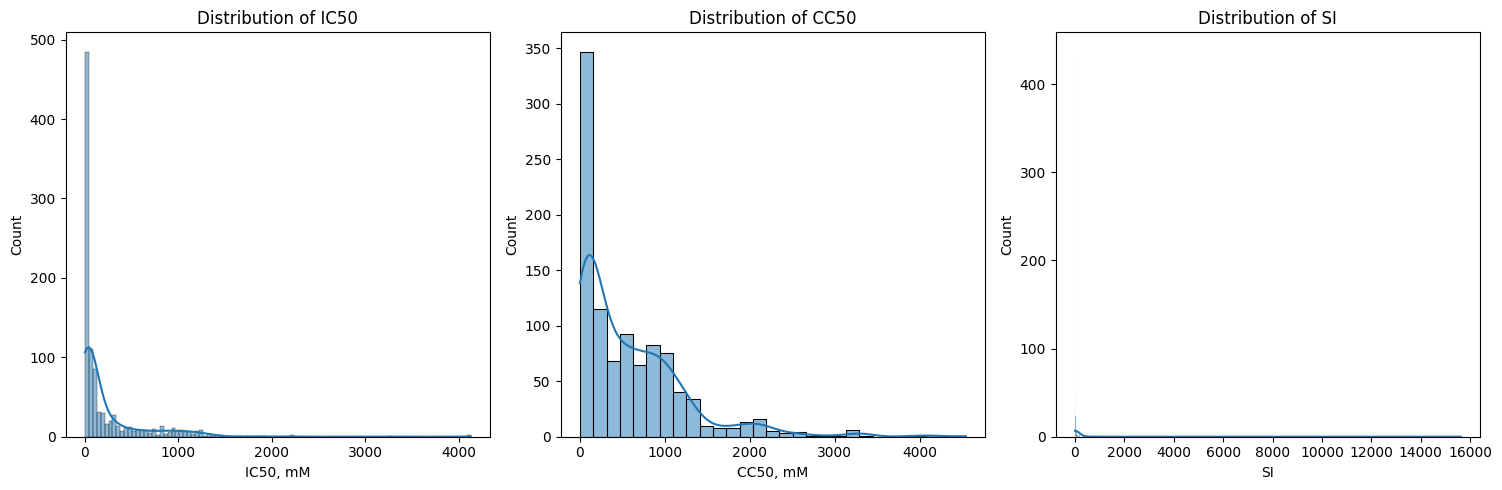

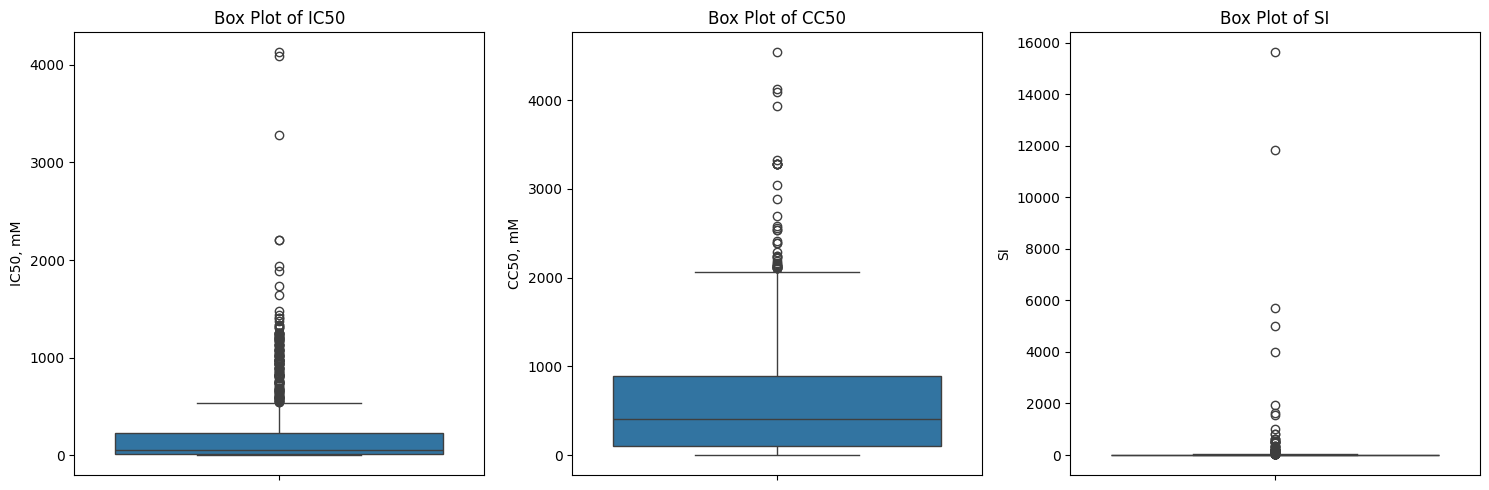

In [ ]:
# Анализ распределения целевых переменных
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['IC50, mM'], kde=True)
plt.title('Distribution of IC50')
plt.subplot(1, 3, 2)
sns.histplot(df['CC50, mM'], kde=True)
plt.title('Distribution of CC50')
plt.subplot(1, 3, 3)
sns.histplot(df['SI'], kde=True)
plt.title('Distribution of SI')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['IC50, mM'])
plt.title('Box Plot of IC50')
plt.subplot(1, 3, 2)
sns.boxplot(y=df['CC50, mM'])
plt.title('Box Plot of CC50')
plt.subplot(1, 3, 3)
sns.boxplot(y=df['SI'])
plt.title('Box Plot of SI')
plt.tight_layout()
plt.show()

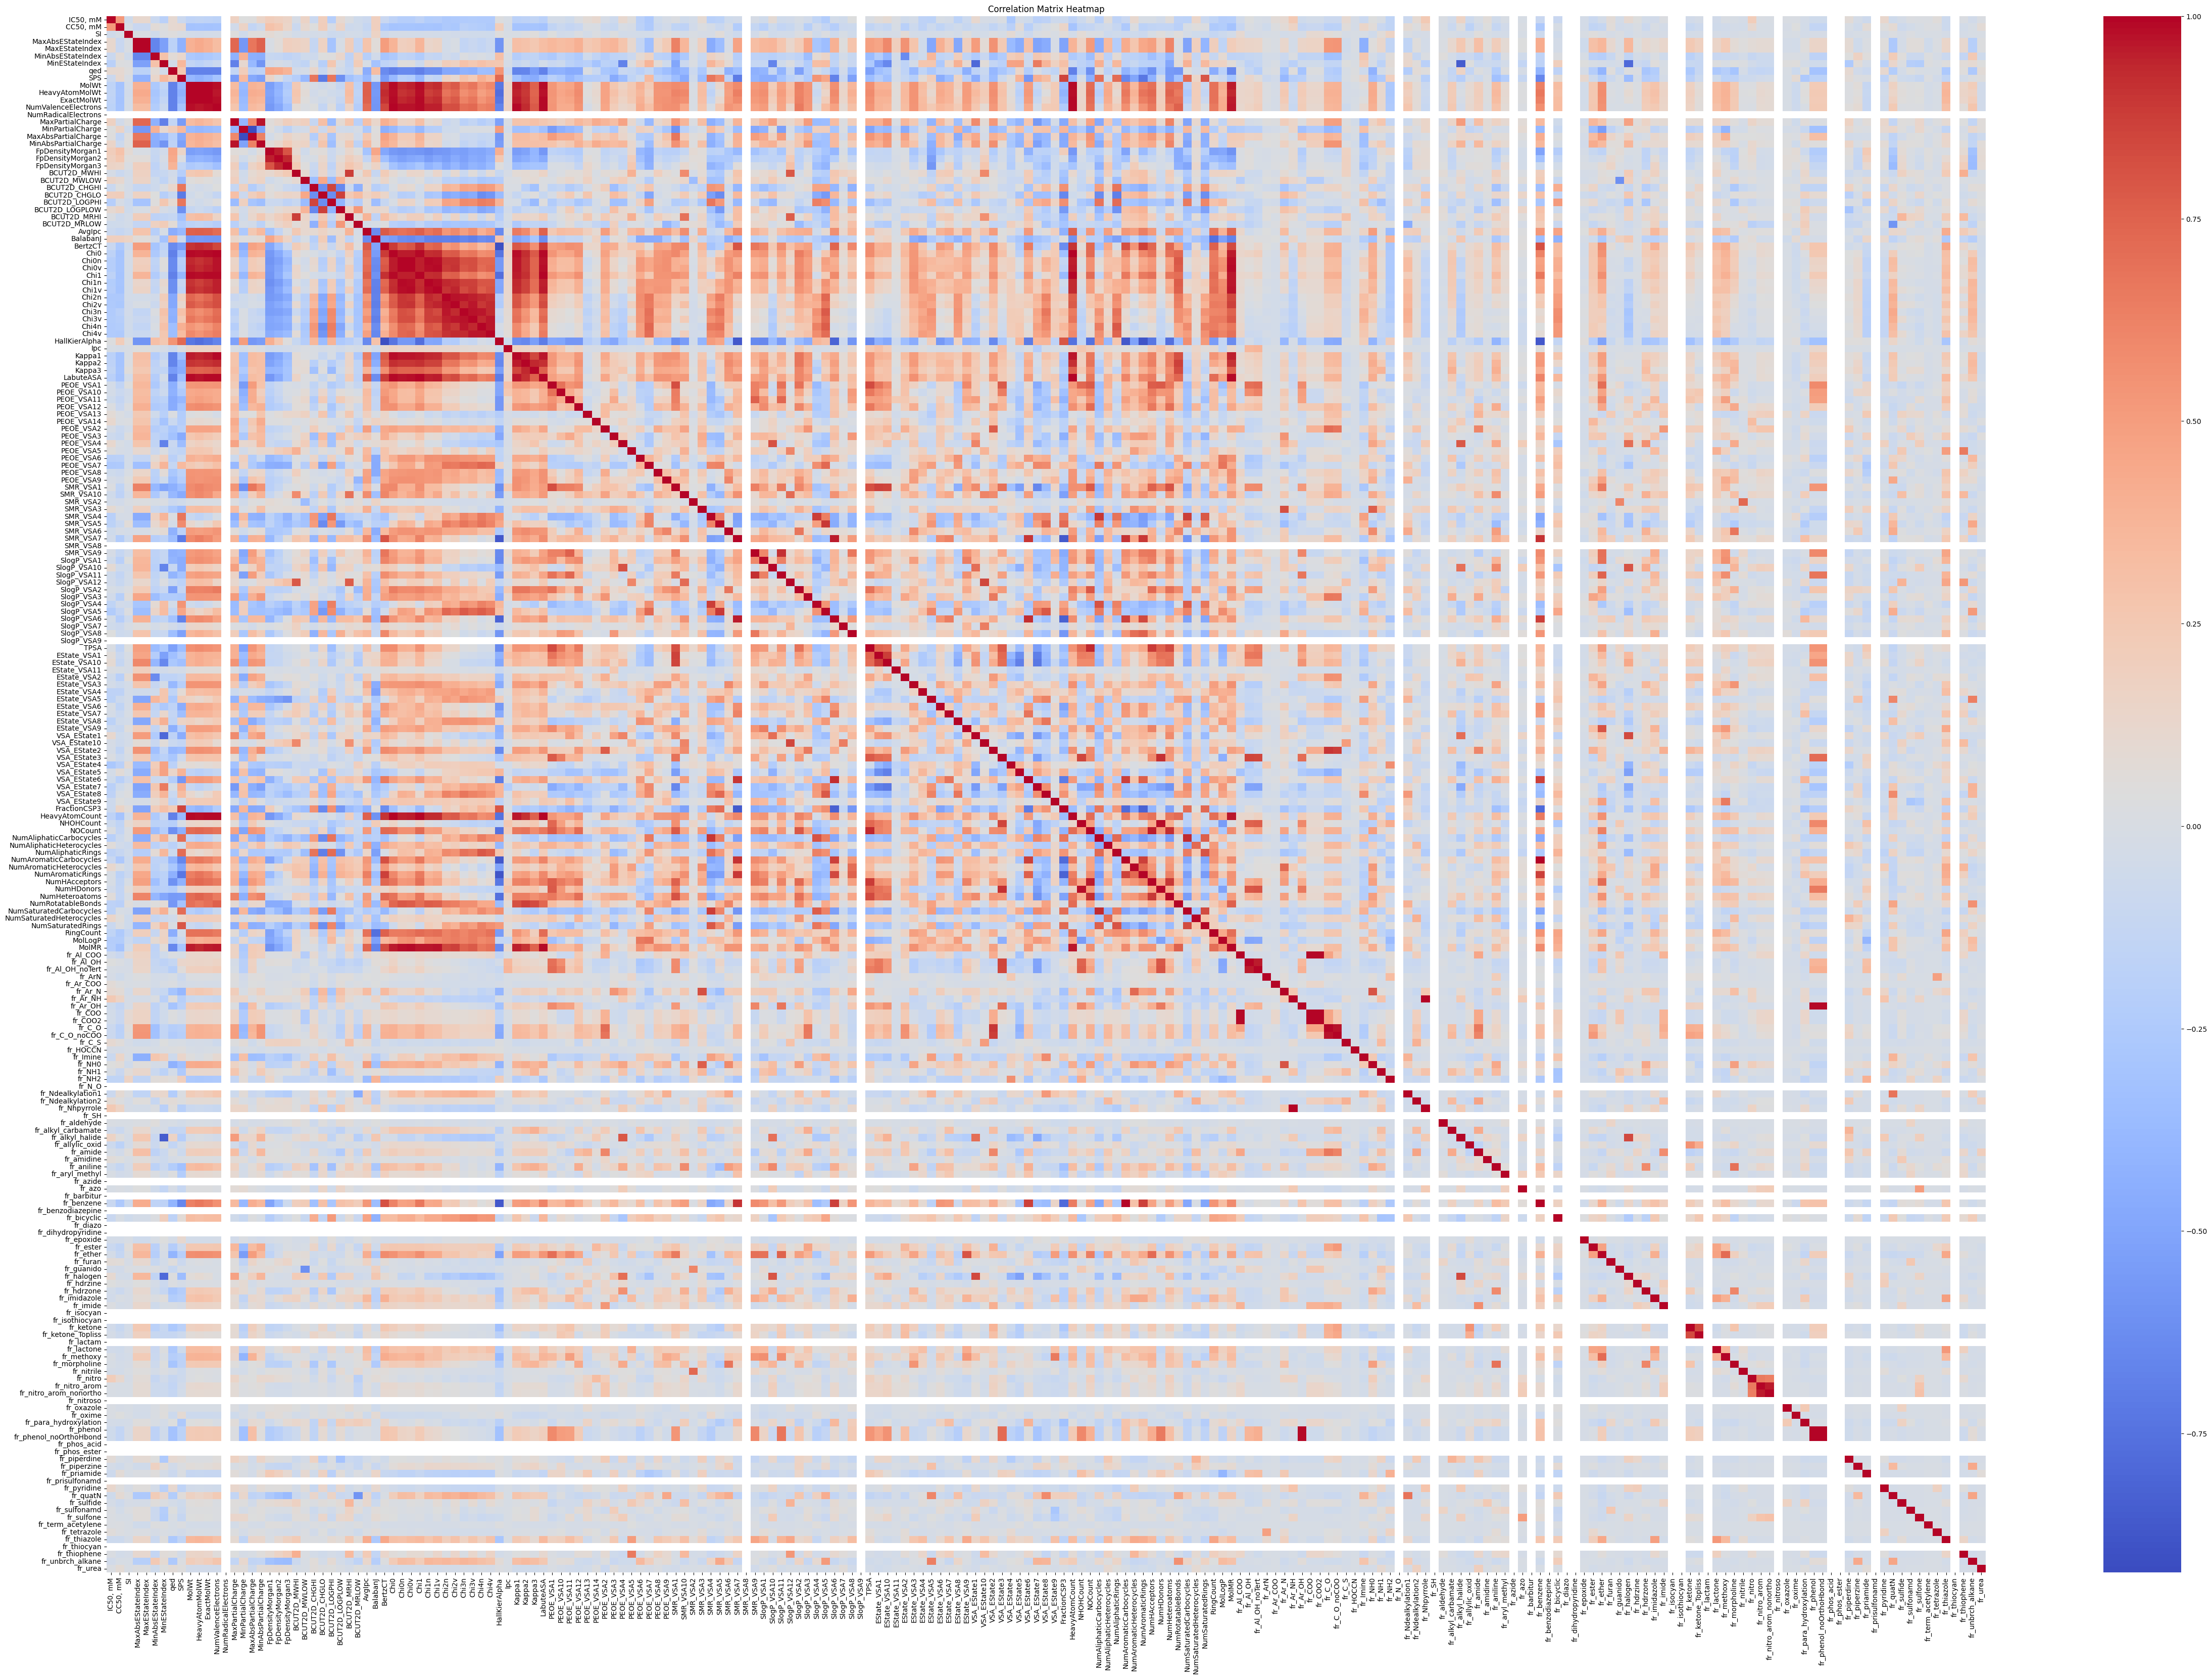

In [ ]:
# Анализ корреляции
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(60, 40))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [70]:
# Определим порог для сильной корреляции
correlation_threshold = 0.8

# Получим абсолютное значение матрицы корреляции
abs_correlation_matrix = correlation_matrix.abs()

# Найдем верхний треугольник матрицы корреляции (исключая диагональ)
# Это нужно, чтобы не дублировать пары и не сравнивать признак с самим собой
upper_triangle = abs_correlation_matrix.where(np.triu(np.ones(abs_correlation_matrix.shape), k=1).astype(bool))

# Найдем признаки с корреляцией выше порога
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

print("Признаки, которые сильно коррелируют с другими признаками и могут быть удалены:", to_drop)

Признаки, которые сильно коррелируют с другими признаками и могут быть удалены: ['MaxEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'SMR_VSA1', 'SMR_VSA7', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'VSA_EState10', 'VSA_EState6', 'FractionCSP3', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAromaticCarbocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedRings', 'MolMR', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_Ar_N', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_NH0', 'fr_Nhpyrr

In [71]:
# Удалим сильно коррелированные признаки из DataFrame
df_cleaned = df.drop(columns=to_drop)

print("\nФорма DataFrame после удаления сильно коррелированных признаков:", df_cleaned.shape)


Форма DataFrame после удаления сильно коррелированных признаков: (1001, 142)


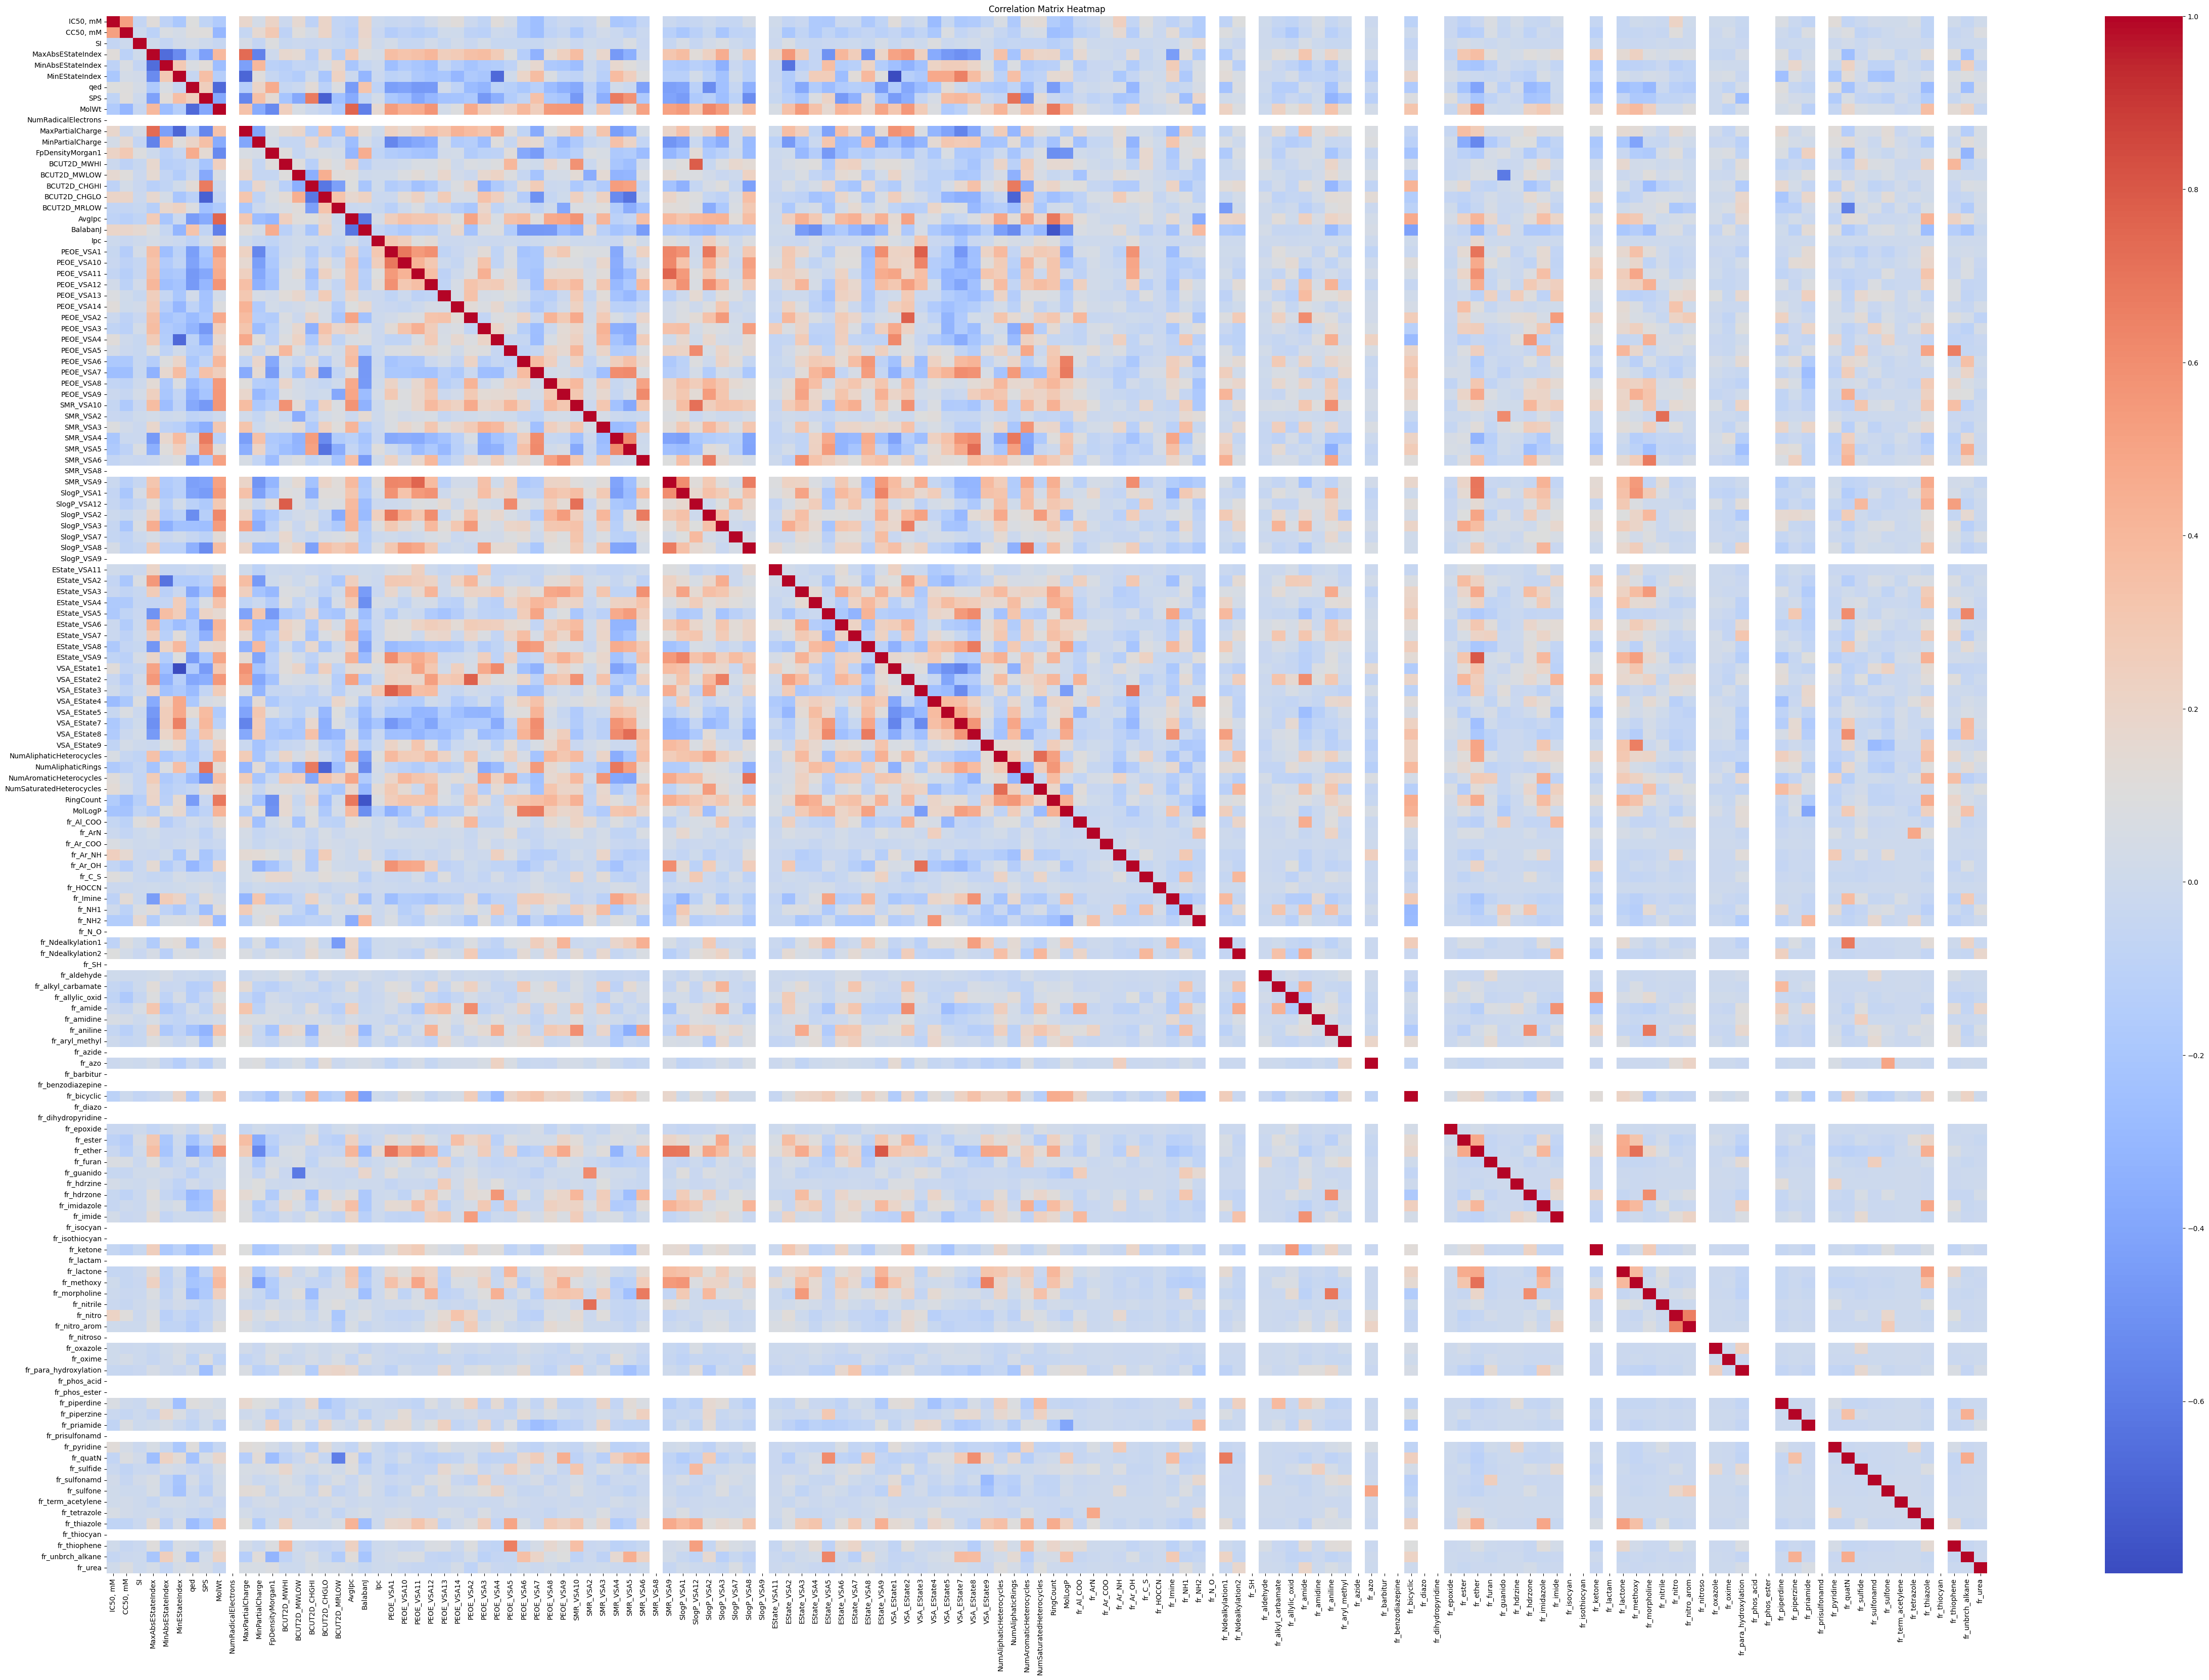

In [ ]:
numerical_features = df_cleaned.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(60, 40))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df_cleaned.to_excel("cleaned_data.xlsx")